# BANDITS

In [9]:
from BanDiTS import preprocessing, apply_along_axis, export_arr, filter_functions, statistical_functions
from BanDiTS.statistical_functions import *
from BanDiTS.filter_functions import *
from BanDiTS.breakpoint_functions import *
from pathos import multiprocessing as mp
from datetime import datetime
import numpy as np



In [15]:
def main():
    ###################################     INPUT    ########################################

    # Input Folder Marlin:
    raster_folder = "E:/Marcel_Daten/Original/"
    # Input Folder Jonas:
    # raster_folder = "C:/Users/jz199/Documents/Studium/Master/1. Semester\Vorlesungsmitschriften/GEO402 - Ableitung von Landoberflächenparametern/Subset/"

    # Input file name
    raster_filename = "S1_A_VH_stack_pilanesberg_full_scene_50m"
    # raster_filename = "SubsetVH.tif"

    ###################################     OUTPUT    ########################################

    # Output Folder Marlin:
    output_folder = "E:/Marcel_Daten/Output/"
    # Output Folder Jonas:
    # output_folder = "C:/Users/jz199/Documents/Studium/Master/1. Semester\Vorlesungsmitschriften/GEO419 - Pythonprogrammierung Habermeyer/GEO402_Output/Latest/"

    ####################### USER-DEPENDENT FILTER-FUNCTIONS TO BE USED #######################
    filter_functions = [mean_filter]
    filter_args = [{"kernel": 3}]
#     filter_functions = [median_filter, median_filter, median_filter, median_filter, median_filter, median_filter]
#     filter_args = [{"kernel": 3}, {"kernel": 5}, {"kernel": 7}, {"kernel": 13}, {"kernel": 15}, {"kernel": 17}]
    # filter_functions = [sobel_filter, sobel_filter, sobel_filter, sobel_filter]
    # filter_args = [{"kernel": [-5, -5, 0, 5, 5]}, {"kernel": [-5, -5, -5, -5, 0, 5, 5, 5, 5]}, {"kernel": [-5, -5, -5, -5, -5, -5, 0, 5, 5, 5, 5, 5, 5]}, {"kernel": [-5, -5, -5, -5, -5, -5, -5, -5, -5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5]}]

    ##################### USER-DEPENDENT STATISTICAL FUNCTIONS TO BE USED #####################
    statistical_functions = [amplitude_stdev]
    statistical_args = [{"sigma":2, "threshold":6}]

    # Output File Name:
    output_file = raster_filename
    return raster_folder, raster_filename, output_folder, filter_functions, filter_args, statistical_functions, statistical_args
    main_time = datetime.now()
    print("main-time = ", main_time - start_time, "Hr:min:sec")

    ######################   NO USER INPUT BEYOND THIS POINT   ###############################


def filter(raster_folder, raster_filename, output_folder, filter_functions, filter_args):
    start_time = datetime.now()
    input_raster = raster_folder + raster_filename
    hdr_file = ""#input_raster + ".hdr"
    outname = output_folder + raster_filename

    # arr: full size numpy array 3D XxYxZ 200x300x100
    arr = preprocessing.rio_array(input_raster, hdr_file=hdr_file)
    dates = arr[1]

    resultlist

    for i, func in enumerate(filter_functions):
        kernel_size = str(filter_args[i]['kernel'])
        filtered_arr = apply_along_axis.parallel_apply_along_axis(func1d=func, arr=arr[0], axis=0, cores=mp.cpu_count(),
                                                                  **filter_args[i])
        filtered_arr = np.rollaxis(filtered_arr, 2)
        filtered_arr = np.rollaxis(filtered_arr, 1)
        filtered_arr = np.rollaxis(filtered_arr, 2)


        dtype = type(filtered_arr[0][0][0])
        func_name_end = str(func).find(" at")
        func_name_start = 10
        func_name = str(func)[func_name_start:func_name_end]

        #### ADD THRESHOLD TO OUTPUT NAME ####
        # export_arr.functions_out_array(outname=outname + "_" + func_name + kernel_size, arr=filtered_arr, input_file=input_raster,
        #                                dtype=dtype)
#         export_arr.functions_out_array(outname=outname + "_" + func_name + str(i), arr=filtered_arr, input_file=input_raster,
#                                        dtype=dtype)

    filter_time = datetime.now()
    print("filter-time = ", filter_time - start_time, "Hr:min:sec")


def statistics(raster_folder, raster_filename, output_folder, statistical_functions, statistical_args):
    start_time = datetime.now()
    input_raster = raster_folder + raster_filename
    hdr_file = ""#input_raster + ".hdr"
    outname = output_folder + raster_filename

    # arr: full size numpy array 3D XxYxZ 200x300x100
    arr = preprocessing.rio_array(input_raster, hdr_file=hdr_file)
    dates = arr[1]

    resultlist = []

    for i, func in enumerate(statistical_functions):
        # creating results with calling wanted algorithm in parallel_apply_along_axis for quick runtime
        result = apply_along_axis.parallel_apply_along_axis(func1d=func, arr=arr[0], axis=0,
                                                            cores=mp.cpu_count(), **statistical_args[i])

        # selecting dtype based on result
        dtype = type(result[0][0])

        func_name_end = str(func).find(" at")
        func_name_start = 10
        func_name = str(func)[func_name_start:func_name_end]

        # exporting result to new raster
        #### ADD THRESHOLD TO OUTPUT NAME ####
#         export_arr.functions_out_array(outname=outname + "_" + func_name + str(i), arr=result, input_file=input_raster,
#                                        dtype=dtype)
        resultlist.append(result)
    
    return resultlist

    breakpoint_time = datetime.now()
    print("breakpoint-time = ", breakpoint_time - start_time, "Hr:min:sec")

# main func
if __name__ == '__main__':
    start_time = datetime.now()
    in_variables = main()
#     test = filter(raster_folder=str(in_variables[0]), raster_filename=str(in_variables[1]),
#            output_folder=str(in_variables[2]), filter_functions=in_variables[3], filter_args=in_variables[4])
    test = statistics(raster_folder=str(in_variables[0]), raster_filename=str(in_variables[1]),
         output_folder=str(in_variables[2]),  statistical_functions=in_variables[5], statistical_args=in_variables[6])


for binary maps use: cmap="binary"

for............

<IPython.core.display.Javascript object>


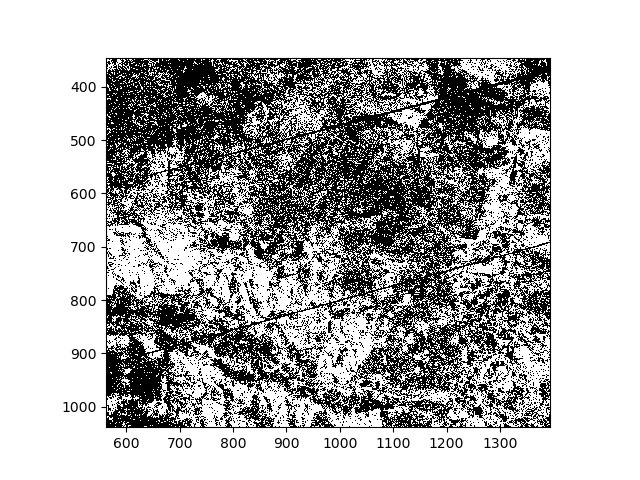

In [16]:
%matplotlib notebook
plt.imshow(test[0], cmap="binary")